In [1]:
!pip install optuna

     |████████████████████████████████| 308 kB 32.1 MB/s 
     |████████████████████████████████| 81 kB 10.5 MB/s 
     |████████████████████████████████| 210 kB 49.4 MB/s 
     |████████████████████████████████| 78 kB 8.5 MB/s 
     |████████████████████████████████| 112 kB 51.6 MB/s 
     |████████████████████████████████| 49 kB 7.7 MB/s 
     |████████████████████████████████| 146 kB 50.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=0268aae9b5806b8e6fe98974dd0066ac9dec05b786956a462da3aec88caf7743
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [2]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.autograd import Variable  # http://taewan.kim/trans/pytorch/tutorial/blits/02_autograd/
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

import pickle
import optuna
import torch.optim as optim 
import joblib

In [3]:
with open('/content/crypto_currency.pickle', 'rb') as f:  # 'rb'는 binary로 읽겠다는 의미 (문자열이 아닌 객체를 읽어보겠다는 뜻)
    data = pickle.load(f)

In [4]:
type(data)

dict

In [5]:
data.keys()

dict_keys(['KRW-BTT', 'KRW-XEC', 'KRW-IQ', 'KRW-IOST', 'KRW-ZIL', 'KRW-MVL', 'KRW-CRE', 'KRW-FCT2', 'KRW-MBL', 'KRW-SC', 'KRW-RFR', 'KRW-JST', 'KRW-MFT', 'KRW-QKC', 'KRW-STMX', 'KRW-TT', 'KRW-AHT', 'KRW-VET', 'KRW-TRX', 'KRW-HUM', 'KRW-MED', 'KRW-SSX', 'KRW-STPT', 'KRW-SNT', 'KRW-DOGE', 'KRW-MOC', 'KRW-LOOM', 'KRW-UPP', 'KRW-DKA', 'KRW-XRP', 'KRW-CHZ', 'KRW-ANKR', 'KRW-META', 'KRW-POWR', 'KRW-TFUEL', 'KRW-ORBS', 'KRW-XEM', 'KRW-AERGO', 'KRW-NU', 'KRW-STRAX', 'KRW-PLA', 'BTC-RSR', 'KRW-BORA', 'KRW-WAXP', 'KRW-HBAR', 'KRW-ELF', 'BTC-RVN', 'KRW-XLM', 'KRW-ARDR', 'KRW-ADA', 'KRW-GLM', 'BTC-ONIT', 'KRW-SAND', 'BTC-SUN', 'KRW-ZRX', 'BTC-REI', 'KRW-POLY', 'KRW-HUNT', 'BTC-MARO', 'KRW-PUNDIX', 'KRW-ENJ', 'KRW-MANA', 'KRW-ICX', 'KRW-CVC', 'KRW-SRM', 'KRW-ONG', 'KRW-CRO', 'KRW-ALGO', 'KRW-ONT', 'BTC-DENT', 'BTC-FOR', 'KRW-IOTA', 'BTC-LINA', 'KRW-WAVES', 'BTC-BASIC', 'KRW-SXP', 'KRW-MATIC', 'KRW-BAT', 'KRW-GRS', 'KRW-STX', 'KRW-HIVE', 'KRW-MLK', 'KRW-STEEM', 'BTC-OBSR', 'BTC-BFC', 'KRW-KNC', 'BTC

In [6]:
type(data['KRW-BTT'])

pandas.core.frame.DataFrame

In [7]:
data['KRW-BTT'].head()

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate,MA5,MA20,MA60
199,KRW-BTT,2019-12-22T00:00:00,2019-12-22T09:00:00,0.00034,0.00035,0.00032,0.00035,1577059163459,3.875621e+08,1.142348e+12,0.00033,0.00002,0.060606,NaN,NaN,NaN
198,KRW-BTT,2019-12-23T00:00:00,2019-12-23T09:00:00,0.00035,0.00035,0.00032,0.00033,1577145521354,2.354836e+08,7.014280e+11,0.00035,-0.00002,-0.057143,NaN,NaN,NaN
197,KRW-BTT,2019-12-24T00:00:00,2019-12-24T09:00:00,0.00033,0.00034,0.00032,0.00033,1577231846379,2.195037e+08,6.680056e+11,0.00033,NaN,0.000000,NaN,NaN,NaN
196,KRW-BTT,2019-12-25T00:00:00,2019-12-25T09:00:00,0.00033,0.00034,0.00032,0.00033,1577318199209,2.566720e+08,7.787632e+11,0.00033,NaN,0.000000,NaN,NaN,NaN
195,KRW-BTT,2019-12-26T00:00:00,2019-12-26T09:00:00,0.00033,0.00033,0.00031,0.00032,1577404329902,2.598816e+08,8.108978e+11,0.00033,-0.00001,-0.030303,0.000332,NaN,NaN


In [8]:
data['KRW-BTT'].shape

(600, 16)

In [9]:
data['KRW-BTT'].columns

Index(['market', 'candle_date_time_utc', 'candle_date_time_kst',
       'opening_price', 'high_price', 'low_price', 'trade_price', 'timestamp',
       'candle_acc_trade_price', 'candle_acc_trade_volume',
       'prev_closing_price', 'change_price', 'change_rate', 'MA5', 'MA20',
       'MA60'],
      dtype='object')

In [10]:
bch = data['KRW-ETH'][['candle_date_time_kst', 'trade_price']]
bch.head()

,candle_date_time_kst,trade_price
119,2018-07-20T09:00:00,511500.0
118,2018-07-21T09:00:00,521600.0
117,2018-07-22T09:00:00,516300.0
116,2018-07-23T09:00:00,509600.0
115,2018-07-24T09:00:00,539200.0


In [11]:
bch.index

Int64Index([119, 118, 117, 116, 115, 114, 113, 112, 111, 110,
            ...
              9,   8,   7,   6,   5,   4,   3,   2,   1,   0],
           dtype='int64', length=720)

In [12]:
bch.set_index('candle_date_time_kst', inplace=True)

In [13]:
bch.index

Index(['2018-07-20T09:00:00', '2018-07-21T09:00:00', '2018-07-22T09:00:00',
       '2018-07-23T09:00:00', '2018-07-24T09:00:00', '2018-07-25T09:00:00',
       '2018-07-26T09:00:00', '2018-07-27T09:00:00', '2018-07-28T09:00:00',
       '2018-07-29T09:00:00',
       ...
       '2022-02-19T09:00:00', '2022-02-20T09:00:00', '2022-02-21T09:00:00',
       '2022-02-22T09:00:00', '2022-02-23T09:00:00', '2022-02-24T09:00:00',
       '2022-02-25T09:00:00', '2022-02-26T09:00:00', '2022-02-27T09:00:00',
       '2022-02-28T09:00:00'],
      dtype='object', name='candle_date_time_kst', length=720)

In [14]:
bch.shape

(720, 1)

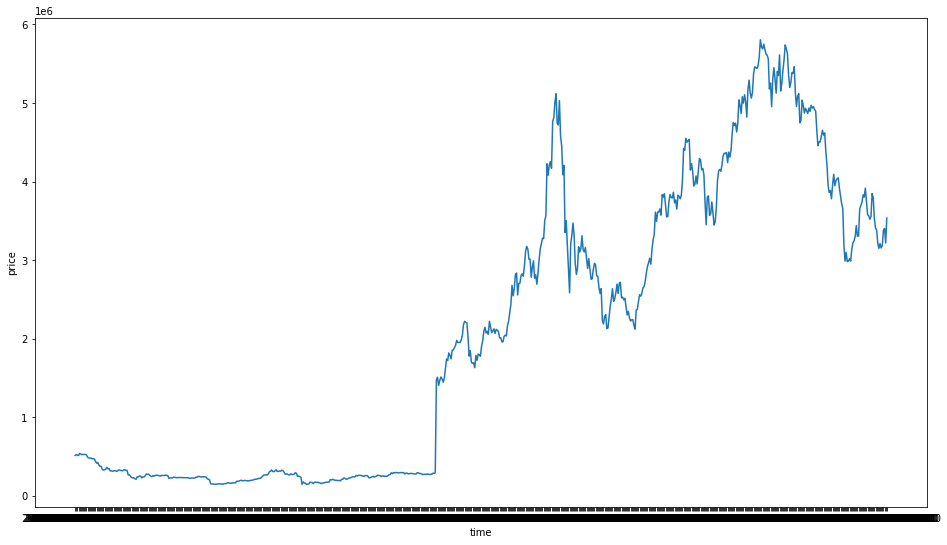

In [15]:
import seaborn as sns

plt.figure(figsize=(16,9))
sns.lineplot(y=bch['trade_price'], x=bch.index)
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [16]:
sc = MinMaxScaler()

In [17]:
training_data = sc.fit_transform(bch[['trade_price']])

In [18]:
def sliding_windows(data, seq_length):
    x = []
    y = []
    
    for i in range(len(data) - seq_length - 1):  # i는 총 699개임, seq_length는 20개, i는 예측 대상일이므로 1개가됨. 
        _x = data[i: (i + seq_length)]  # _x에는 길이가 20인 vector가 들어감
        _y = data[i + seq_length]
        x.append(_x)
        y.append(_y)
    return np.array(x), np.array(y)

In [19]:
x, y = sliding_windows(training_data, 20)

In [20]:
x.shape   # 20 x 1의 feature가 됨.

(699, 20, 1)

In [21]:
y.shape  # scalar가 종속변수가 됨.

(699, 1)

In [24]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()  # 객체화 과정에서 가장 먼저 사용하는 함수(initialize), 메모리에 올릴 때 이 작업을 함
        self.num_classes = num_classes  # 함수의 인자들을 class가 인식할 수 있도록 self 키워드를 붙여서 다시 저장
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, seq_length = seq_length,
                            num_layers = num_layers, batch_first = True)  # lstm이라는 layer가 괄호 속 인자들을 가지고 있는 pytorch의 LSTM 모듈을 가짐.
        
        self.fc = nn.Linear(hidden_size, num_classes)  # fully connected layer, num_classes는 1개
        # input_size는 1개가 20번씩 들어감 (20개의 일자), hidden_size는 cell state와 hidden state의 크기로 hyper param임 (보통 4의 배수를 사용)
        # num_layers는 layer들을 stacking하는 개수를 의미 
    
    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))  # 첫 단계의 값이 없으므로 zero 행렬 이용 0으로 설정
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        
        # propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)  # output은 매 단계마다 나오며, 그 중 맨 마지막 값만 출력
        
        out = self.fc(h_out)
        
        return out

In [23]:
trial.suggest_int('num_layers', 7, 30, 1)

NameError: ignored

In [ ]:
seq_length = 20

In [25]:
def train_model(trial): 
  cfg = {'train_batch_size' : trial.suggest_categorical('train_batch_size',[16, 32, 64, 128, 256, 512]),
         'test_batch_size' : trial.suggest_categorical('test_batch_size',[16, 32, 64, 128, 256, 512]), 
         'num_epochs' : trial.suggest_int('n_epochs', 5, 50, 1), 
         'seed' : 0, 
         'save_model' : False, 
         'lr' : trial.suggest_loguniform('lr', 1e-3, 1e-2), 
         'seq_length' : trial.suggest_int('num_layers', 7, 30, 1),
         'num_layers' : trial.suggest_int('num_layers', 1, 3, 1),
         'hidden_size' : trial.suggest_categorical('hidden_size',[16, 32, 64, 128, 256, 512]),
         'input_size' : 1,
         'num_classes' : 1,
         'optimizer': trial.suggest_categorical('optimizer',[torch.optim.Adam])} 
         
  torch.manual_seed(cfg['seed']) 

  train_ds = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
  train_dl = DataLoader(train_ds, batch_size=cfg['train_batch_size'])

  test_ds = TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test))
  test_dl = DataLoader(test_ds, batch_size=cfg['test_batch_size'])

  model = LSTM(num_classes=cfg['num_classes'], input_size =cfg['input_size'], hidden_size=cfg['hidden_size'], num_layers=cfg['num_layers'], seq_length=cfg['seq_length'])
  optimizer = cfg['optimizer'](model.parameters(), lr=cfg['lr']) 
  criterion = torch.nn.MSELoss()

  for epoch in range(1, cfg['num_epochs'] + 1):
    for xb, yb in train_dl:
        outputs = model(xb)
        optimizer.zero_grad()
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, loss: {loss.item()}')    
    
  if cfg['save_model']: 
    torch.save(model.state_dict(), "lstm_optuna.pt") 

  return loss.item()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=False)

In [27]:
sampler = optuna.samplers.TPESampler() 

study = optuna.create_study(sampler=sampler, direction='maximize') 
study.optimize(train_model, n_trials=5) 
joblib.dump(study, '/content/gdrive/My Drive/Colab_Data/studies/mnist_optuna.pkl')

[I 2022-05-22 04:58:04,693] A new study created in memory with name: no-name-adaef40d-e959-4eb8-958b-1e1ceefb019d
/usr/local/lib/python3.7/dist-packages/optuna/trial/_trial.py:780: RuntimeWarning: Inconsistent parameter values for distribution with name "num_layers"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 7, 'high': 30, 'step': 1}
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'torch.optim.adam.Adam'> which is of type type.
  warnings.warn(message)
[W 2022-05-22 04:58:04,709] Trial 0 failed because of the following error: TypeError("__init__() got an unexpected keyword argu

TypeError: ignored

In [ ]:
study = joblib.load('/content/gdrive/My Drive/Colab_Data/studies/mnist_optuna.pkl') 
df = study.trials_dataframe().drop(['state','datetime_start','datetime_complete','system_attrs'], axis=1) 
df.head(3)

FileNotFoundError: ignored

In [ ]:
model.eval()
pred = []
for xb, yb in test_dl:
    train_predict = model(xb)
    pred.extend(train_predict.data.numpy().squeeze())

In [ ]:
len(pred)

140

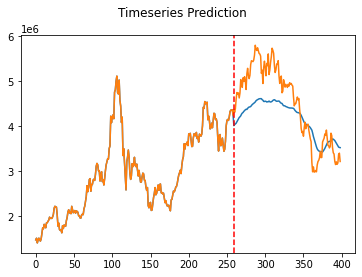

In [ ]:
y_train.shape

np.expand_dims(pred, axis=1).shape

predicted_for_plot = sc.inverse_transform(np.concatenate((y_train, np.expand_dims(pred, axis=1))))
actual_for_plot = sc.inverse_transform(np.concatenate((y_train, y_test)))

predicted_for_plot.shape

actual_for_plot.shape

plt.plot(predicted_for_plot[300:])
plt.plot(actual_for_plot[300:])
plt.suptitle('Timeseries Prediction')
plt.axvline(x=y_train.shape[0]-300, c='r', linestyle='--')
plt.show()

In [ ]:
num_epochs = 50
learning_rate = .001
seq_length = 20
input_size = 1
hidden_size = 16
num_layers = 1
num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr = learning_rate)

In [ ]:
for epoch in range(num_epochs):
    for xb, yb in train_dl:
        outputs = lstm(xb)
        optimizer.zero_grad()
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, loss: {loss.item()}')       

Epoch: 0, loss: 0.7263018488883972
Epoch: 10, loss: 0.005445906892418861
Epoch: 20, loss: 0.002341147046536207
Epoch: 30, loss: 0.0037367662880569696
Epoch: 40, loss: 0.0027937397826462984


In [ ]:
lstm.eval()
pred = []
for xb, yb in test_dl:
    train_predict = lstm(xb)
    pred.extend(train_predict.data.numpy().squeeze())

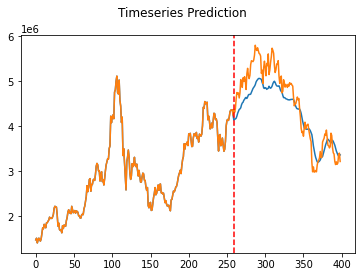

In [ ]:
y_train.shape

np.expand_dims(pred, axis=1).shape

predicted_for_plot = sc.inverse_transform(np.concatenate((y_train, np.expand_dims(pred, axis=1))))
actual_for_plot = sc.inverse_transform(np.concatenate((y_train, y_test)))

predicted_for_plot.shape

actual_for_plot.shape

plt.plot(predicted_for_plot[300:])
plt.plot(actual_for_plot[300:])
plt.suptitle('Timeseries Prediction')
plt.axvline(x=y_train.shape[0]-300, c='r', linestyle='--')
plt.show()